# Step 1: Load all files

In [2]:
# Install missing libraries if needed (uncomment below lines in Jupyter if required)
# !pip install pandas numpy scikit-learn matplotlib seaborn xgboost imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [3]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("dataset1.csv")
test_df = pd.read_csv("dataset2.csv")

# Step 2: Basic Cleaning & Date Parsing

In [6]:
# Check for missing values
print(df.isnull().sum())

# Data types info
print(df.info())

# Statistical summary
print(df.describe())

Claim_ID                              0
Bind_Date1                            0
Customer_Life_Value1                  0
Age_Insured                           0
Policy_Num                            0
                                     ..
Claim_Amount_to_Vehicle_Cost_Ratio    0
Claim_Severity_Index                  0
Multiple_Claims_Flag                  0
Out_of_State_Claim                    0
Garage_Location_Mismatch              0
Length: 70, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Claim_ID                             40000 non-null  object 
 1   Bind_Date1                           40000 non-null  object 
 2   Customer_Life_Value1                 40000 non-null  int64  
 3   Age_Insured                          40000 non-null  int64  
 4   Policy_Num               

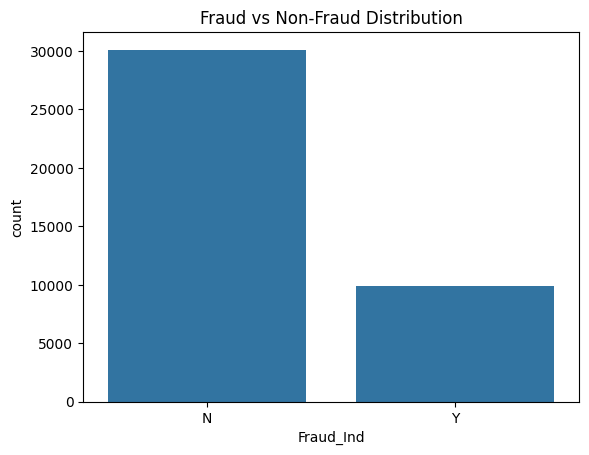

In [7]:
# Visualize class distribution
sns.countplot(x='Fraud_Ind', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

In [11]:
df['Fraud_Ind'] = df['Fraud_Ind'].map({'Y': 1, 'N': 0})

a. Handle Missing Values

In [12]:
# Check missing values again
print(df.isnull().sum())

# Simple strategy: fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Confirm no missing values
print(df.isnull().sum().sum(), "missing values remaining")

Claim_ID                              0
Bind_Date1                            0
Customer_Life_Value1                  0
Age_Insured                           0
Policy_Num                            0
                                     ..
Claim_Amount_to_Vehicle_Cost_Ratio    0
Claim_Severity_Index                  0
Multiple_Claims_Flag                  0
Out_of_State_Claim                    0
Garage_Location_Mismatch              0
Length: 70, dtype: int64


C:\Users\rajat\AppData\Local\Temp\ipykernel_6576\3339425598.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\rajat\AppData\Local\Temp\ipykernel_6576\3339425598.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

0 missing values remaining


C:\Users\rajat\AppData\Local\Temp\ipykernel_6576\3339425598.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\rajat\AppData\Local\Temp\ipykernel_6576\3339425598.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

# Step 3: KPI Extraction (Exploratory Metrics)

In [13]:
print("📊 KPI Dashboard for Auto Insurance Fraud Dataset\n")

# 1. Fraud Rate
fraud_rate = df['Fraud_Ind'].mean() * 100
print(f"Fraud Rate: {fraud_rate:.2f}%")

# 2. Average Claim Amount (Fraud vs Non-Fraud)
avg_claims = df.groupby('Fraud_Ind')['Total_Claim'].mean()
print(avg_claims)

# 3. Claim Severity by Fraud Status
severity = df.groupby('Fraud_Ind')['Claim_Severity_Index'].mean()
print(severity)

# 4. State-wise Fraud Distribution
state_fraud = df[df['Fraud_Ind'] == 1]['Policy_State'].value_counts().head(10)
print(state_fraud)

# 5. Customer Profile Insights
# Average age of fraudulent claimants.
# Top occupations with fraudulent claims.
avg_age_fraud = df[df['Fraud_Ind'] == 1]['Age_Insured'].mean()
top_occupations = df[df['Fraud_Ind'] == 1]['Occupation'].value_counts().head(5)
print(f"Avg Age of Fraudulent Claimants: {avg_age_fraud}")
print("Top Occupations with Fraudulent Claims:")
print(top_occupations)

# 6. High-Risk Time Frames
# Weekend vs weekday.
# Night accidents vs day accidents.
weekend_fraud = df.groupby('Weekend_Accident')['Fraud_Ind'].mean()
night_fraud = df.groupby('Night_Accident')['Fraud_Ind'].mean()
print("Fraud rate by weekend:", weekend_fraud)
print("Fraud rate by night accidents:", night_fraud)


📊 KPI Dashboard for Auto Insurance Fraud Dataset

Fraud Rate: 24.70%
Fraud_Ind
0    13917.554526
1    14054.108997
Name: Total_Claim, dtype: float64
Fraud_Ind
0    13917.554526
1    14054.108997
Name: Claim_Severity_Index, dtype: float64
Policy_State
OH    3705
IN    3212
IL    2963
Name: count, dtype: int64
Avg Age of Fraudulent Claimants: 39.29463562753036
Top Occupations with Fraudulent Claims:
Occupation
exec-managerial      1082
craft-repair          896
machine-op-inspct     876
tech-support          839
sales                 835
Name: count, dtype: int64
Fraud rate by weekend: Weekend_Accident
0    0.261913
1    0.208085
Name: Fraud_Ind, dtype: float64
Fraud rate by night accidents: Night_Accident
0    0.252486
1    0.230175
Name: Fraud_Ind, dtype: float64


# Step 4: Exploratory Data Analysis (EDA)


Step 4.1: Import Required Libraries

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set default style
sns.set(style="whitegrid")

Step 4.2: Class Balance (Fraud vs Non-Fraud)

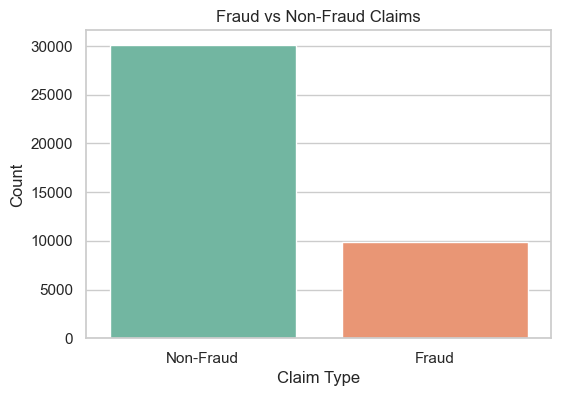

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Fraud_Ind', data=df, palette='Set2')
plt.title("Fraud vs Non-Fraud Claims")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel("Claim Type")
plt.ylabel("Count")
plt.show()

Step 4.3: Claim Amount Distribution by Fraud Status

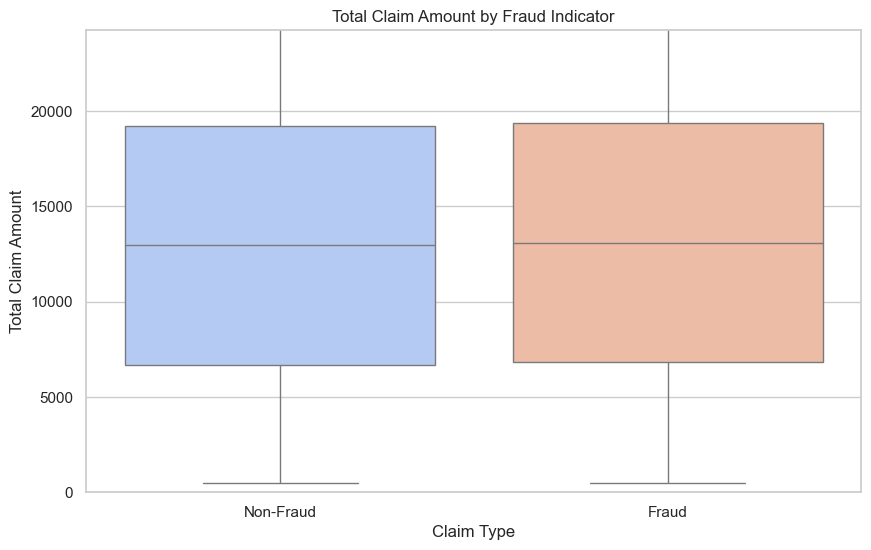

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fraud_Ind', y='Total_Claim', data=df, palette='coolwarm')
plt.title("Total Claim Amount by Fraud Indicator")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel("Claim Type")
plt.ylabel("Total Claim Amount")
plt.ylim(0, df['Total_Claim'].quantile(0.95))  # Remove outliers
plt.show()

Step 4.4: Accident Type vs Fraud

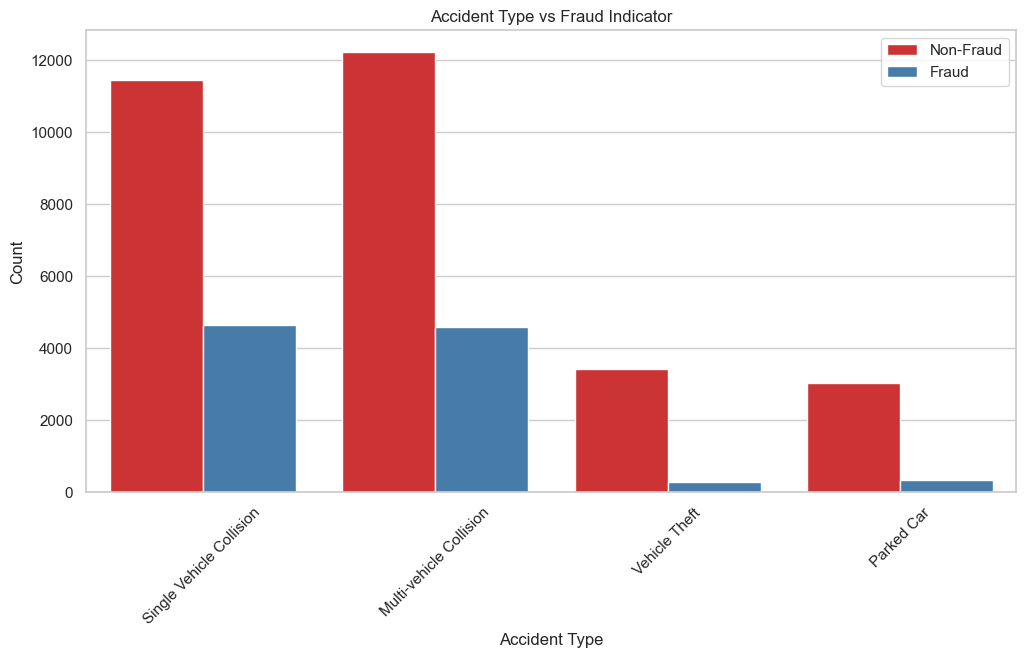

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Accident_Type', hue='Fraud_Ind', palette='Set1')
plt.title("Accident Type vs Fraud Indicator")
plt.xticks(rotation=45)
plt.xlabel("Accident Type")
plt.ylabel("Count")
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

Step 4.5: Correlation Heatmap (Numerical Features)

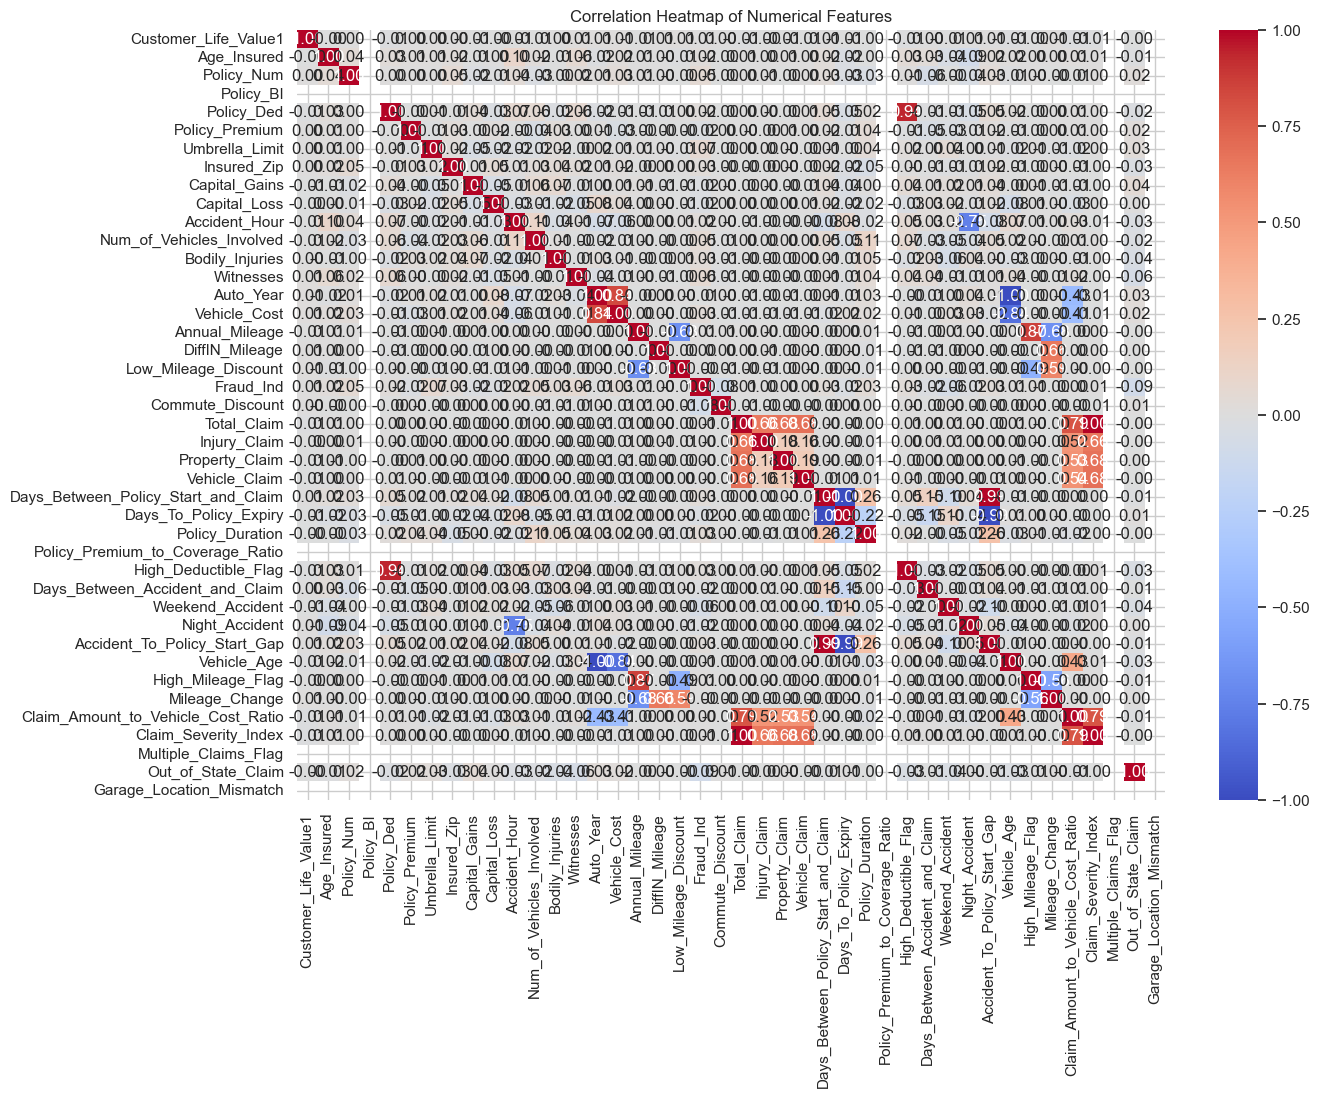

In [18]:
# Select numerical features
num_cols = df.select_dtypes(include='number')

plt.figure(figsize=(14,10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Step 4.6: Fraud Rate by Police Report Availability

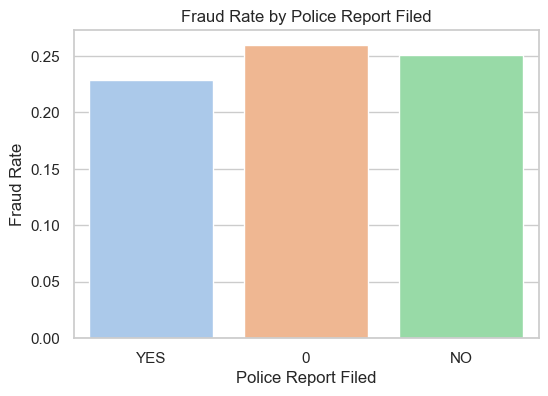

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Police_Report', y='Fraud_Ind', ci=None, palette='pastel')
plt.title("Fraud Rate by Police Report Filed")
plt.xlabel("Police Report Filed")
plt.ylabel("Fraud Rate")
plt.show()

Step 4.7: Vehicle Year vs Fraud Count

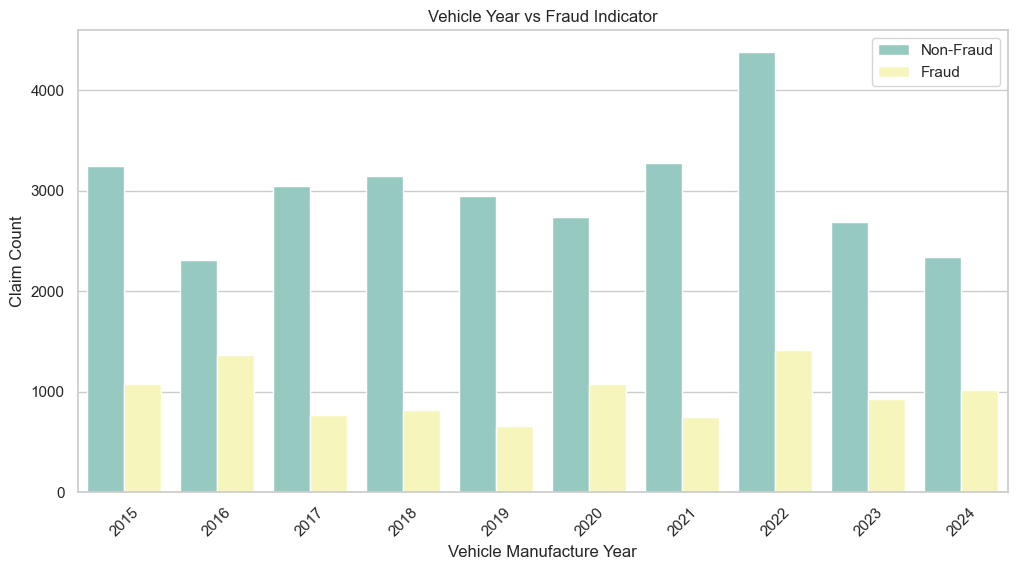

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Auto_Year', hue='Fraud_Ind', palette='Set3')
plt.title("Vehicle Year vs Fraud Indicator")
plt.xticks(rotation=45)
plt.xlabel("Vehicle Manufacture Year")
plt.ylabel("Claim Count")
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

# Step 5: Feature Engineering & Encoding

1. Separate Features (X) and Target (y)

In [21]:
# Target already converted: Fraud_Ind (1 = Fraud, 0 = Not Fraud)
X = df.drop('Fraud_Ind', axis=1)
y = df['Fraud_Ind']

2. Identify Categorical & Numerical Columns

In [24]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

print("Categorical Columns:", categorical_cols.tolist())
print("Numeric Columns:", numeric_cols.tolist())

Categorical Columns: []
Numeric Columns: ['Customer_Life_Value1', 'Age_Insured', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Occupation', 'Hobbies', 'Capital_Gains', 'Capital_Loss', 'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Bodily_Injuries', 'Witnesses', 'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Days_Between_Policy_Start_and_Claim', 'Days_To_Policy_Expiry', 'Policy_Duration', 'Policy_Premium_to_Coverage_Ratio', 'High_Deductible_Flag', 'Days_Between_Accident_and_Claim', 'Weekend_Accident', 'Night_Accident', 'Accident_To_Policy_Start_Gap', 'Vehicle_Age', 'High_Mileage_Flag', 'Mileage_Change', 'Claim_Amount_to_Vehicle_Cost_Ratio', 'Claim_Severity_Index', 'Multiple_Claims_Flag', 'Out_of_State_Claim', 'Garage_Location_Mismatch', 'Policy_State_IN', 'Policy_State_OH', 'Gender

3. Updated Feature Engineering & Encoding

In [23]:
# Drop IDs and redundant date columns
drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration',
             'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
             'Accident_Date', 'Claims_Date', 'DL_Expiry_Date']
X = X.drop(columns=drop_cols)

# Re-identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in categorical_cols:
    if X[col].nunique() > 10:
        X[col] = label_enc.fit_transform(X[col])
    else:
        X = pd.get_dummies(X, columns=[col], drop_first=True)

4. Handle Class Imbalance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), 
                              eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

print("Model Comparison:")
print(results_df)


  File "c:\Users\rajat\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\rajat\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rajat\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

# Step 6: Model Building & Evaluation

Step 6.1: Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6.2: All models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), 
                              eval_metric='logloss', use_label_encoder=False, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred)
    ])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
1        Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
6              XGBoost  1.000000   1.000000  1.000000  1.000000  1.000000
3    Gradient Boosting  0.943375   0.936901  0.829840  0.880127  0.905581
5                  KNN  0.911000   0.869143  0.758982  0.810336  0.860395
4             AdaBoost  0.834875   0.708105  0.579840  0.637586  0.749977
0  Logistic Regression  0.592375   0.305478  0.492515  0.377077  0.559133


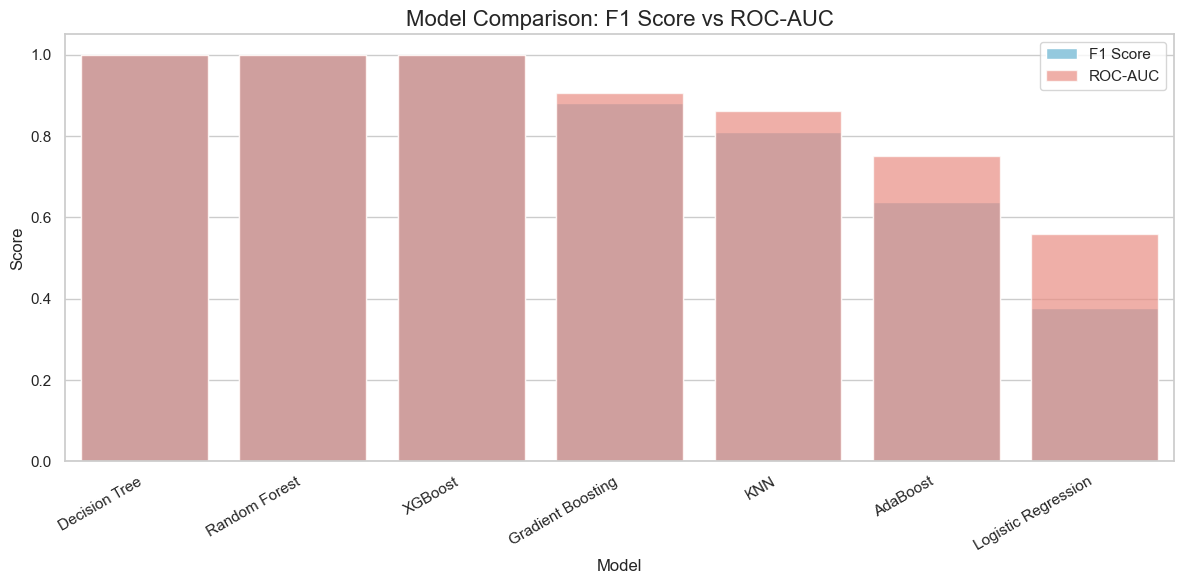

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x="Model", y="F1 Score", color="skyblue", label="F1 Score")
sns.barplot(data=results_df, x="Model", y="ROC-AUC", color="salmon", alpha=0.7, label="ROC-AUC")
plt.title("Model Comparison: F1 Score vs ROC-AUC", fontsize=16)
plt.ylabel("Score")
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Define all model

In [31]:
# Cell 2
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

train each model

In [32]:
from sklearn.impute import SimpleImputer

# Create imputer object
imputer = SimpleImputer(strategy='mean')  # or strategy='median' / 'most_frequent'

# Fit on training data and transform both train & test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [33]:
# Cell 3
results = []

for name, model in models.items():
    print(f"==================== {name} ====================")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Save results
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    })
    
    print("\n\n")


==================== Logistic Regression ====================
Accuracy: 0.7828571428571428

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     10960
         1.0       0.00      0.00      0.00      3040

    accuracy                           0.78     14000
   macro avg       0.39      0.50      0.44     14000
weighted avg       0.61      0.78      0.69     14000


Confusion Matrix:
 [[10960     0]
 [ 3040     0]]



==================== Decision Tree ====================
Accuracy: 0.9512857142857143

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     10960
         1.0       0.90      0.88      0.89      3040

    accuracy                           0.95     14000
   macro avg       0.93      0.92      0.93     14000
weighted avg       0.95      0.95      0.95     14000


Confusion Matrix:
 [[10652   308]
 [  374  2666]]



============

  File "c:\Users\rajat\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\rajat\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rajat\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

Accuracy: 0.9032142857142857

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     10960
         1.0       0.80      0.74      0.77      3040

    accuracy                           0.90     14000
   macro avg       0.86      0.84      0.85     14000
weighted avg       0.90      0.90      0.90     14000


Confusion Matrix:
 [[10399   561]
 [  794  2246]]



==================== Support Vector Machine ====================
Accuracy: 0.7828571428571428

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     10960
         1.0       0.00      0.00      0.00      3040

    accuracy                           0.78     14000
   macro avg       0.39      0.50      0.44     14000
weighted avg       0.61      0.78      0.69     14000


Confusion Matrix:
 [[10960     0]
 [ 3040     0]]



==================== Naive Bayes ====================
Accuracy: 0

In [34]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Optional external boosting models
# !pip install xgboost lightgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Bagging & Boosting models
boosting_models = {
    "Bagging (DT)": BaggingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}


In [ ]:
import joblib

for name, model in boosting_models.items():
    print(f"==================== {name} ====================")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n\n")

    # Save metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    })

    # ✅ Save model to file (convert name to filename-friendly format)
    filename = f"{name.replace(' ', '_').replace('(', '').replace(')', '')}.pkl"
    joblib.dump(model, filename)
    # joblib.dump(X_train.columns.tolist(), "features_list.pkl")

==================== Bagging (DT) ====================
Accuracy: 0.9577857142857142

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     10960
         1.0       0.87      0.94      0.91      3040

    accuracy                           0.96     14000
   macro avg       0.93      0.95      0.94     14000
weighted avg       0.96      0.96      0.96     14000


Confusion Matrix:
 [[10540   420]
 [  171  2869]]





AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# saved model


In [41]:
print(X.columns.tolist())

['Customer_Life_Value1', 'Age_Insured', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Capital_Gains', 'Capital_Loss', 'authorities_contacted', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report', 'Auto_Year', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Accident_to_Claim_Days', 'Policy_to_Claim_Days', 'Vehicle_Age', 'Weekend_Accident', 'Accident_Type_Parked Car', 'Accident_Type_Single Vehicle Collision', 'Accident_Type_Vehicle Theft', 'Collision_Type_Rear Collision', 'Collision_Type_Side Collision', 'Collision_Type_Unknown', 'Policy_State_IN', 'Policy_State_OH', 'Acccident_City_Columbus', 'Acccident_City_Hillsdale', 'Acccident_City_Northbend', 'Acccident_City_Northbrook', 'Acccident_City_Riverwood', 'Acccident_City_Springfield', 'Garage_Location_Yes', 'Vehicle_Color_Blue', 'Vehi

# testing
